In [1]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.pyplot import subplot
from tqdm import tqdm
import h5py 
import os
import re
import subprocess

In [2]:
folder_path = "../"
write_path = "../gwtc3_converted/"

PLANCK_2018_Ho = 2.1816926176539463e-18 ### CGS
PLANCK_2018_OmegaMatter = 0.3158
PLANCK_2018_OmegaLambda = 1. - PLANCK_2018_OmegaMatter
PLANCK_2018_OmegaRadiation = 0.

In [3]:
# Read the data
files = (file for file in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, file)))
events_files = list(filter(lambda x: x.endswith((".h5", ".hdf5")), files))
for i in range(len(events_files)):print(f"{i+1}. {events_files[i]}")

1. IGWN-GWTC3p0-v1-GW200225_060421_PEDataRelease_mixed_cosmo.h5
2. IGWN-GWTC2p1-v2-GW190521_074359_PEDataRelease_mixed_cosmo.h5
3. IGWN-GWTC2p1-v2-GW190915_235702_PEDataRelease_mixed_cosmo.h5
4. IGWN-GWTC3p0-v1-GW200224_222234_PEDataRelease_mixed_cosmo.h5
5. IGWN-GWTC2p1-v2-GW190706_222641_PEDataRelease_mixed_cosmo.h5
6. IGWN-GWTC2p1-v2-GW190412_053044_PEDataRelease_mixed_cosmo.h5
7. IGWN-GWTC2p1-v2-GW190929_012149_PEDataRelease_mixed_cosmo.h5
8. IGWN-GWTC3p0-v1-GW200209_085452_PEDataRelease_mixed_cosmo.h5
9. IGWN-GWTC3p0-v1-GW200219_094415_PEDataRelease_mixed_cosmo.h5
10. IGWN-GWTC2p1-v2-GW190828_065509_PEDataRelease_mixed_cosmo.h5
11. IGWN-GWTC3p0-v1-GW191129_134029_PEDataRelease_mixed_cosmo.h5
12. IGWN-GWTC3p0-v1-GW191109_010717_PEDataRelease_mixed_cosmo.h5
13. IGWN-GWTC2p1-v2-GW190408_181802_PEDataRelease_mixed_cosmo.h5
14. IGWN-GWTC3p0-v1-GW200216_220804_PEDataRelease_mixed_cosmo.h5
15. IGWN-GWTC2p1-v2-GW190707_093326_PEDataRelease_mixed_cosmo.h5
16. IGWN-GWTC3p0-v1-GW200115_04230

In [4]:
if not os.path.exists(write_path + "event-list.txt"):
    with open(write_path + "event-list.txt", "w") as f:
        pass

In [5]:
#regex
re1 = r"GWTC-1"
re2= r"GWTC2p1"
re3 = r"GWTC3"

In [6]:
file_open_error = []
file_convert_error = []
event_waveforms = []

for i in tqdm(range(len(events_files))): 
    file_path = events_files[i]
    event_file = folder_path+file_path
    
    with h5py.File(event_file,'r+') as file: 
            waveform = list(file.keys())[0]
            event_waveforms.append(f"Converting {waveform} from {event_file}")
            
    args = [f"{waveform}", f"{event_file}",
            "--Ho", f"{PLANCK_2018_Ho}", "--OmegaMatter", f"{PLANCK_2018_OmegaMatter}", "--OmegaRadiation",
            f"{PLANCK_2018_OmegaRadiation}", "--OmegaLambda", f"{PLANCK_2018_OmegaLambda}", "-o", f"{write_path}"]
    
    if re.search(re1, file_path):
        subprocess.run(["python", "h52csv_GWTC1.py", *args])
    elif re.search(re2, file_path):
        subprocess.run(["python", "h52csv_GWTC2p1.py", *args])
    elif re.search(re3, file_path):
        subprocess.run(["python", "h52csv_GWTC3.py", *args])
    else:
        raise ValueError("No match found")
    

100%|██████████| 74/74 [03:04<00:00,  2.49s/it]


In [7]:
# i = 52
# file_path = events_files[i]
# event_file = folder_path+file_path
# 
# with h5py.File(event_file,'r+') as file: 
#         waveform = list(file.keys())[0]
#         event_waveforms.append(f"Converting {waveform} from {event_file}")
#         
# args = [f"{waveform}", f"{event_file}",
#         "--Ho", f"{PLANCK_2018_Ho}", "--OmegaMatter", f"{PLANCK_2018_OmegaMatter}", "--OmegaRadiation",
#         f"{PLANCK_2018_OmegaRadiation}", "--OmegaLambda", f"{PLANCK_2018_OmegaLambda}", "-o", f"{write_path}", "-v"]
# 
# if re.search(re1, file_path):
#     subprocess.run(["python", "h52csv_GWTC1.py", *args])
# elif re.search(re2, file_path):
#     subprocess.run(["python", "h52csv_GWTC2p1.py", *args])
# elif re.search(re3, file_path):
#     subprocess.run(["python", "h52csv_GWTC3.py", *args])
# else:
#     raise ValueError("No match found")

In [8]:
# read txt file
event_txt_files = []
with open(write_path + "event-list.txt", "r") as f:
    event_txt_files = f.readlines()

print("Number of events converted: ", len(event_txt_files))
print("Number of events with errors: ", len(file_open_error)+len(file_convert_error))
print("Total number of events: ", len(events_files))

Number of events converted:  74
Number of events with errors:  0
Total number of events:  74


In [9]:
# Read events and confirm the conversion. 
import numpy as np
event_txt_files = []
with open(write_path + "event-list.txt", "r") as f:
    event_txt_files = f.read().splitlines()
event_txt_files

['GW200225_060421.csv.gz',
 'GW190521_074359.csv.gz',
 'GW190915_235702.csv.gz',
 'GW200224_222234.csv.gz',
 'GW190706_222641.csv.gz',
 'GW190412_053044.csv.gz',
 'GW190929_012149.csv.gz',
 'GW200209_085452.csv.gz',
 'GW200219_094415.csv.gz',
 'GW190828_065509.csv.gz',
 'GW191129_134029.csv.gz',
 'GW191109_010717.csv.gz',
 'GW190408_181802.csv.gz',
 'GW200216_220804.csv.gz',
 'GW190707_093326.csv.gz',
 'GW200115_042309.csv.gz',
 'GW191204_171526.csv.gz',
 'GW190519_153544.csv.gz',
 'GW190731_140936.csv.gz',
 'GW151226_033853.csv.gz',
 'GW190413_134308.csv.gz',
 'GW190512_180714.csv.gz',
 'GW170818_022509.csv.gz',
 'GW190620_030421.csv.gz',
 'GW200128_022011.csv.gz',
 'GW190814_211039.csv.gz',
 'GW191127_050227.csv.gz',
 'GW170608_020116.csv.gz',
 'GW150914_095045.csv.gz',
 'GW190602_175927.csv.gz',
 'GW190803_022701.csv.gz',
 'GW190701_203306.csv.gz',
 'GW190513_205428.csv.gz',
 'GW190630_185205.csv.gz',
 'GW190503_185404.csv.gz',
 'GW170814_103043.csv.gz',
 'GW170823_131358.csv.gz',
 

 73%|███████▎  | 54/74 [00:07<00:02,  8.70it/s]

Problem at the following event GW170817.csv.gz


100%|██████████| 74/74 [00:10<00:00,  6.86it/s]


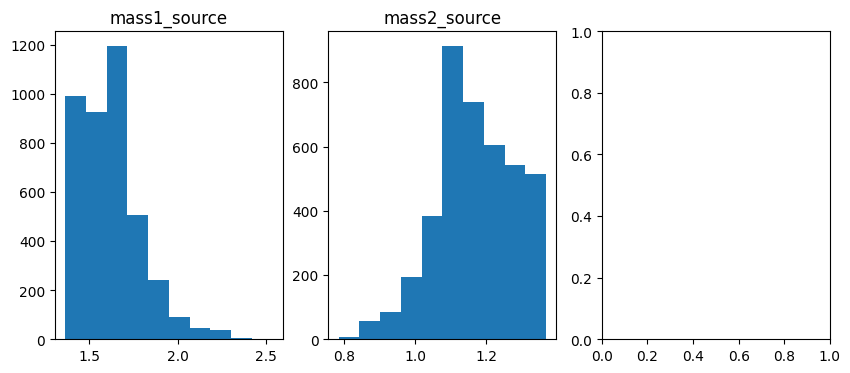

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

for i in tqdm(range(len(event_txt_files))):
    try:
        event = event_txt_files[i]
        df = pd.DataFrame(np.genfromtxt(write_path + event, delimiter=",", names=True))
        fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(10, 4))
        ax[0].hist(df["mass1_source"]); ax[0].set_title("mass1_source")
        ax[1].hist(df["mass2_source"]); ax[1].set_title("mass2_source")
        ax[2].hist(df["luminosity_distance"]); ax[2].set_title("luminosity_distance")
        plt.suptitle(event[:8] + f" - PE Size: {df.shape[0]}")
        plt.savefig("verify_PE/" + event[:8] + ".png")
        plt.close()
    except:
        print("Problem at the following event", event)